In [1]:
# import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

# bibliotecas para pintar prismas!
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Import da biblioteca externa:
from plots import plots_rectangles
from plots import plots_paint_rectangles

# Tarefa : 
> Plotar prismas de acordo com os dados fornecidos que são o número de observações e as dimensões referentes aos prismas. Neste caso, estamos considerando prismas de mesmas dimensões. Posteriormente, iremos diferenciar os prismas entre si. (OK)

In [4]:
# Coletando os limites em x e z do levantamento sintético:
nobs = 11 # número de observações
zmin = 0.0 # limite mínimo em z do levantamento sintético
zmax = 10.0 # limite máximo em z do levantamento sintético
xmin = 0.0 # limite mínimo em x do levantamento sintético
xmax = 100.0 # limite máximo em x do levantamento sintético

In [5]:
# definindo as coordenadas sinteticas do levantamento:
x = np.linspace(xmin, xmax, nobs, endpoint=True)
# é possível gerar valores para z de três formas distintas com as 4 linhas abaixo
z = np.linspace(0, 0, nobs, endpoint=True)
#z = np.zeros( len(x) )
#for i in range( len(x) ):
#    z[i] = random.uniform(0.0, -10.0)

print(x[1]-x[0])

10.0


In [6]:
# cálculo do valor que deve ser somado ou subtraido aos pontos de observação para se ter as coordenadas x dos retângulos:
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = abs( x[0] - ( xmed ) )

print (x_prisma)

5.0


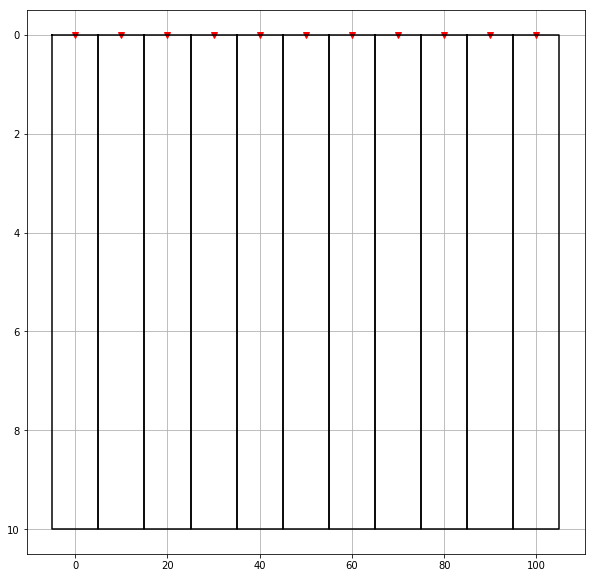

In [7]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )
plt.plot(x,z,'vr')

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

# os triângulos vermelhos consideram o relevo que pode ser a vir adicionado mais a frente dependendo do caso

# Tarefa:
> Testar a funcao plots_rectangles com o objetivo de representar um ambiente qualquer por retângulos: (OK)

In [8]:
# definicao das profundidades de cada prisma (a posteriori, sera o resultado obtido)
# é possível gerar valores para p de duas formas distintas com as 4 linhas abaixo
#p = np.linspace(2.0, 20.0, len(x), endpoint=True )
p = np.zeros( len(x) )
for i in range( len(x) ):
    p[i] = random.uniform(10.0, 20.0)

print( p )

[10.3482663  17.3801361  16.31508416 18.53348109 17.07305592 15.19206635
 11.55761231 18.44761747 13.93676765 12.21466184 16.70234541]


In [9]:
# definindo os valores de constraste de densidade
cden = np.zeros( len(x) )
for i in range( len(x) ):
    cden[i] = random.uniform(0.0, 30.0) 
print( cden )

[25.68668895 23.53405356 14.9182966  15.91897312  4.63768309 10.40404689
 26.06370078  9.28488381 21.08209271  2.0881598  28.85502791]


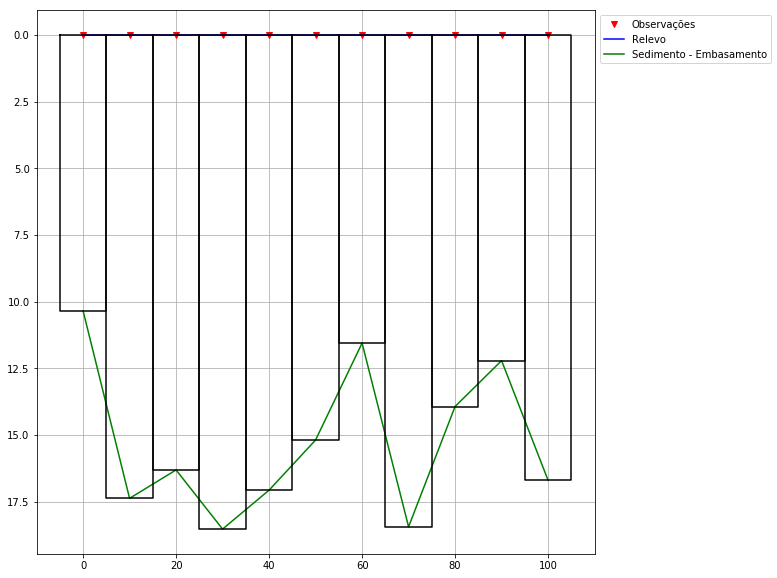

In [10]:
# teste da função plots_rectangles
x_coord, z_coord = plots_rectangles(x, z, p, color1='blue', color2='black', color3='green')

# Tarefas:
> (1) Ajustar o negocio ai (grafico) para observacoes que simulam um relevo (zo variavel) (OK, foi ajustado acima) <br> 
> (2) Preencher cada retangulo com cores, onde cada cor representa um contraste de densidade (OK) ($g/cm^3$)

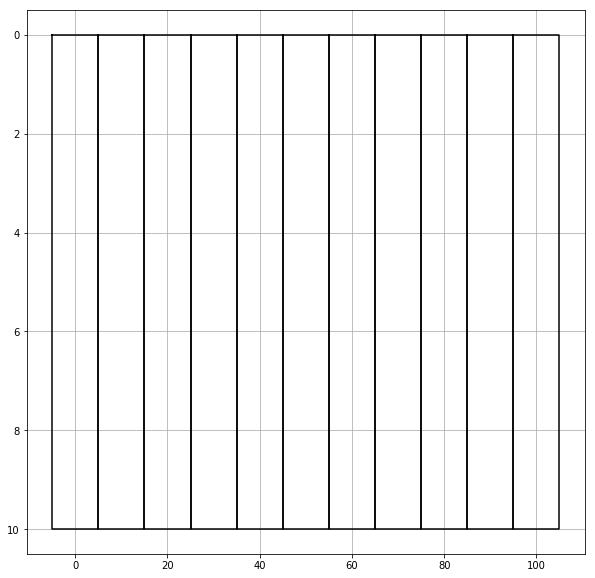

In [11]:
# inicio do desenvolvimento do raciocínio para preencher os retângulos com cores
# Visualização gráfica:
plt.figure( figsize=(10,10) )

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

i = 0 => [13.89788763 27.7290178  20.08003847 28.07613268 16.334099  ]
i = 1 => [ 0.72457262 10.57879332 10.07521739 18.0414768   4.01854161]
i = 2 => [13.75695692  9.3740595  28.05065674 23.86878516  3.25173701]
i = 3 => [18.58014047 10.50865251  4.21128996  3.82694181 10.06888396]
i = 4 => [ 6.76827782 17.22846651 14.01577322  5.6059855  11.20736084]
i = 5 => [ 8.80899773 23.24539295 29.29575469 18.40462503  6.80285434]
i = 6 => [ 7.30085608 17.43740271 24.94343054  0.65405205 16.22598203]
i = 7 => [ 8.29169473 28.07078473  2.18550571  6.71413941  9.2416147 ]
i = 8 => [17.01844307 11.90322473 17.09140708  8.5546427   1.31960301]
i = 9 => [11.6142767  21.90272884  9.38905141 20.56788651  0.4020158 ]
i = 10 => [28.55007959  4.13562746 22.92618721 23.31103707  3.70719936]


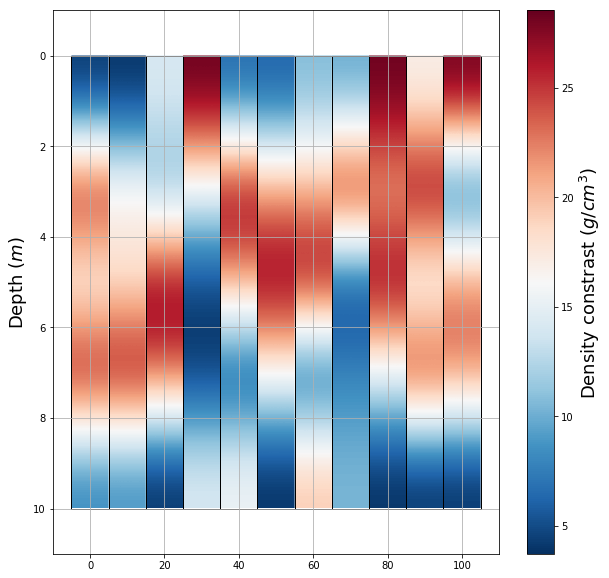

In [12]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow
plt.figure( figsize=(10,10) )

beta = 3.7 # valor do coeficiente de decaimento para a fórmula do constraste de densidade
rho0 = 2.78 # valor do constraste de densidade da superfície para a fórmula do constraste de densidade

for i in range(nobs):    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    cden = np.zeros( len(xp) )
    for j in range( len(xp) ): # construindo um vetor com valores de constraste de densidade aleatórios
        #zz = np.linspace( 0.0, p[i], len(xp), endpoint=True )
        #cden[j] = rho0 * beta**2/( beta + zz[j] )**2 # aplicação da fórmula do constraste da densidade 
        cden[j] = random.uniform(0.0, 30.0)
    print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=min(cden), vmax=max(cden),
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    # os valores de mi e ma serão usados para definir os extremos da escala de cor do plt.imshow no próximo code
    # lista1 salvará todos os valores de contraste de densidade gerados para serem usados no próximo code
    if i == (nobs - 1):
        mi = min(cden)
        ma = max(cden) 
    if i == 0: 
        lista1 = [cden]
    else:    
        lista1.append(cden)
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
# se a colorbar for colocada dentro do for, será possível ver que é adotada uma escala de cor para cada prisma separado
# pelo comentário acima, foi visto uma necessidade de padronizar essa colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 2 => [13.75695692  9.3740595  28.05065674 23.86878516  3.25173701]


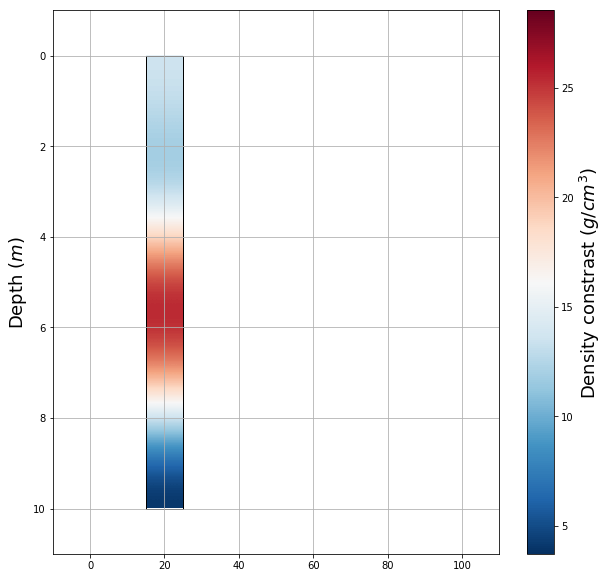

In [13]:
# Conferindo a colorbar para cada prisma (ATUALIZANDO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 2 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

cden = np.array(lista1[i]) 
print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)
    
im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=mi, vmax=ma,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) 
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [21.13656968433496, 16.083158749726564, 0.8843767163295368, 8.676126239988287, 2.5069016581584833]
i = 1 => [7.19393065901036, 10.813711741884754, 9.04309604589691, 9.713732708913788, 6.498387604544291]
i = 2 => [25.99577708867635, 19.93393558052634, 7.309623691193385, 25.51427507621899, 6.525643886664767]
i = 3 => [4.434849594392023, 11.374705106065031, 8.674335402805589, 1.5227465974257715, 22.75662684535982]
i = 4 => [18.330631782991937, 15.398819835540731, 7.1562312035333395, 8.155510459456698, 17.207069615576984]
i = 5 => [0.16428517086251593, 20.52441329484926, 5.984674177836338, 25.75730636141093, 6.492385615169827]
i = 6 => [9.429997787229697, 6.049977696955958, 11.353204218738139, 14.833684981074446, 29.165680115761937]
i = 7 => [19.10820290558471, 3.015605166110118, 17.276876234225146, 12.163746096507937, 23.12568186280843]
i = 8 => [16.148255381956037, 18.680008124846754, 17.669637875626833, 6.327111933789143, 16.702667388561178]
i = 9 => [5.582748752711534, 26.8125

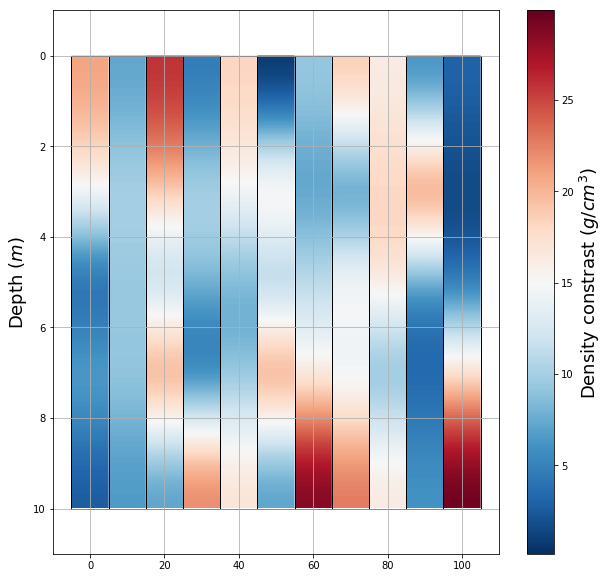

In [14]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow (ATUALIZADO)
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs):
    # gerando valores aleatórios para contraste de densidade
    # salvando os valores máximos e mínimos de contraste de densidade para a escala de cor de plt.imshow
    for j in range( len(xp) ): 
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0: 
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente

for i in range (nobs):
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    # os valores de mi2 e ma2 serão usados para definir os extremos da escala de cor do plt.imshow no próximo code
    if i == (nobs - 1):
        for j in range ( len(xp) ):
            if j == 0:
                mi2 = cden[i][j]
                ma2 = cden[i][j]
            else:
                if cden[i][j] > ma2:
                    ma2 = cden[i][j]
                if cden[i][j] < mi2:
                    mi2 = cden[i][j]
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma]) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

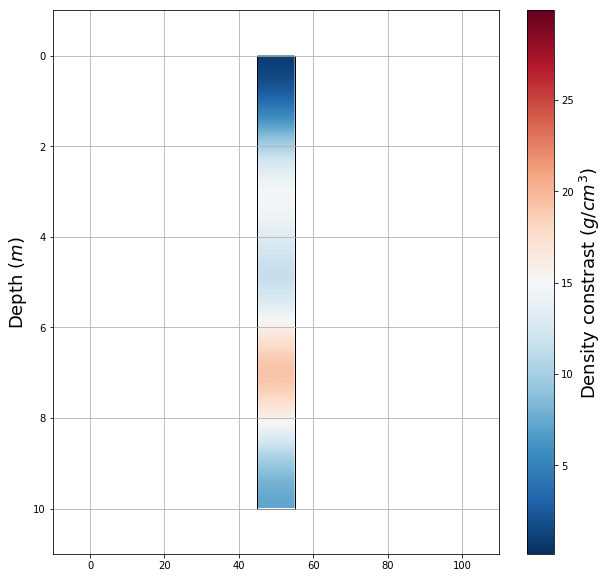

In [15]:
# Conferindo a colorbar para cada prisma (ATUALIZADO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 5 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)

cden_part = np.array( cden[i] )
im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma])
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [19.15508460058583, 22.327019383913715, 8.1660590531954, 27.966173621918024, 20.172290662833998]
i = 1 => [10.823877257202684, 23.264875768234628, 0.026798377353435265, 19.83604652719592, 16.26734778304293]
i = 2 => [7.570073381940416, 12.775856228542926, 11.100080011270293, 2.651910969235054, 29.52077632710539]
i = 3 => [29.19326122367783, 29.726446112921604, 25.892018627997782, 5.053001387034564, 6.371270215072209]
i = 4 => [2.6594059439154494, 19.515194532237658, 13.139679758988507, 27.612863333459995, 8.991895426003653]
i = 5 => [15.568963006877713, 6.160428052648158, 23.959577427223, 3.303921816290213, 22.178306144979327]
i = 6 => [14.804302888792039, 18.387132541175617, 24.31638345166957, 9.229942259051334, 18.037389316625042]
i = 7 => [10.760662958745002, 14.970036156613883, 14.816133785794174, 10.79586282866066, 4.42044027857162]
i = 8 => [8.425273540714297, 15.626138081629485, 23.089952978916774, 1.5028194368389114, 10.906179912690291]
i = 9 => [1.3512740434122772, 24

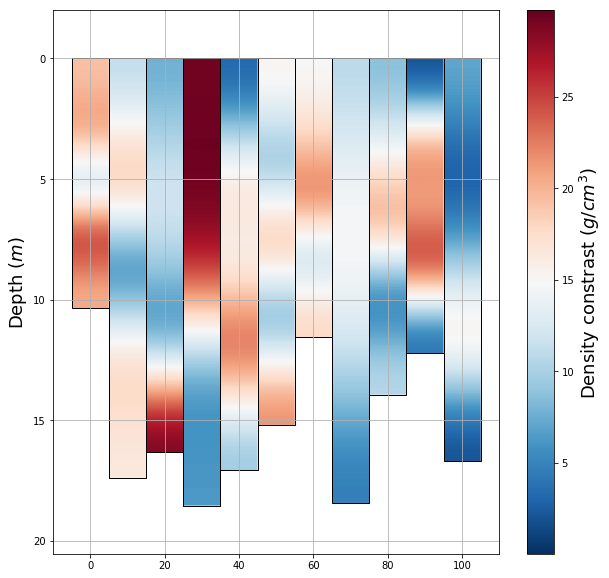

In [16]:
# Aplicando o relevo aos prismas já coloridos devidamente com o plt.imshow
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs): 
    # gerando valores aleatórios para contraste de densidade
    # salvando os valores máximos e mínimos de contraste de densidade para a escala de cor de plt.imshow
    for j in range( 5 ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0:
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
     
for i in range (nobs): # pintando as áreas dos retângulos     
    zp = np.array([ z[i], z[i], z[i] + p[i] , z[i] + p[i], z[i] ])
    # salvando os valores máximos e mínimos de profundidade para definir melhor o intervalo do eixo y
    if i == 0:
        zmin2 = z[i] 
        zmax2 = z[i] + p[i]
    else:
        if z[i] + p[i]  > zmax2:
            zmax2 = z[i] + p[i]
        if z[i]  < zmin2:
            zmin2 = z[i] 
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim(zmax2 + 2, zmin2 - 2)

plt.grid()
plt.show()

# Tarefa:
> Testar a função plots_paint_rectangles para plotar retângulos pintados de forma que representem o ambiente com uma certa fidelidade e que sejam pintados de acordo com alguma propriedade ou grandeza física das subperfícies que esteja em estudo. Essa função será testada em dois casos que são descritos abaixo. <br>
>> (1) Considerar essa propriedade ou grandeza física constante para cada retângulo (OK) <br>
>> (2) Considerar essa propriedade ou grandeza física variando para cada retângulo (OK)

## TODO:
> (1) Generalizar o numero de pontos (elementos de var) dentro de cada prisma para plotagem (refinar as cores) (OK)<br>
> (2) A pessoa estipula a nivel de referencia que deseja utilizar para a posicao do topo de cada prismas. (Essa é uma questão que foi deixada de lado, pois não era o foco do momento)

i = 0 => [5.643393605781829, 12.378545004676202, 9.26703561948958, 4.767456389393575, 4.195941917379584]
i = 1 => [19.719821497514527, 1.0744119064980218, 13.27715387224345, 25.324043646990976, 26.428754010443203]
i = 2 => [17.030533631181342, 8.562592423405935, 1.1681760045230805, 25.45599863386031, 19.39065783816503]
i = 3 => [4.326998175359318, 29.933147885622976, 2.738439399980619, 1.6865718523596063, 4.778494948140489]
i = 4 => [25.801700816133256, 11.145476725278415, 24.078061510054823, 16.996265519818188, 24.206423697473703]
i = 5 => [16.958414924086092, 8.517890852675253, 20.073125240602625, 16.09252123745154, 7.230052189227286]
i = 6 => [2.2680112632282667, 6.298704234495571, 9.280347304455795, 26.297069111654896, 19.246086920855905]
i = 7 => [14.433998460862865, 16.38332854481438, 10.704248154389031, 17.744407904570416, 9.23909637428229]
i = 8 => [10.8068383294356, 8.316412795302048, 4.214768911048198, 29.033473164090793, 22.686384834426182]
i = 9 => [21.487562322480677, 14.0

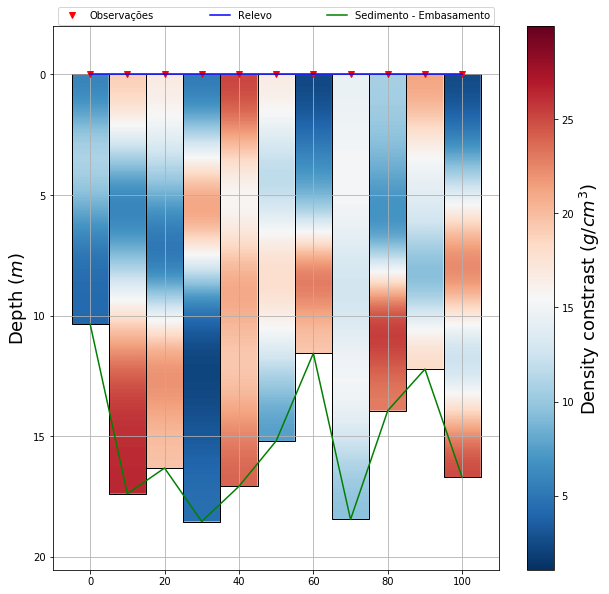

In [17]:
# Caso em que a propriedade ou grandeza física varia ou é constante para cada retângulo:
cden = []
n = 5
for i in range (nobs):
    for j in range( n ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
            
plots_paint_rectangles(x, z, p, n_var=n, var=cden, name='Density constrast $(g/cm^3)$', cmap='RdBu_r',
                       color1='blue', color2='green')

# Tarefa:
> Desenvolver a rotina computacional que adapta a equação demonstrada abaixo ao que já foi realizado anteriormente, ou seja, calcular o valor da anomalia gravitacional em cada ponto de observação considerando todos os retângulos gerados. <br>
>> (1) Adaptar a equação para o calculo da anomalia gravitacional gerada apenas por um retângulo qualquer. (OK) <br>
>> (2) Expandir a adaptação em (1) para o caso de um modelo que considera diversos retângulos. 

# Equação a ser adaptada (Potential Theory in Applied Geophysics, pág.66)
<img src='figs/ic_grav_formula.png' width="700px" align="center">

In [18]:
# Caso de adaptacao da equacao para apenas um retangulo qualquer

# Utilizando um dos retangulos criados anteriormente

x1 = abs( x[0] - (x[0] - x_prisma ) )     
x2 = abs( x[0] - (x[0] + x_prisma ) )      
z1 = zmin
z2 = zmax
teta1 = np.arctan(z1/x1)
teta2 = np.arctan(z1/x2)
teta3 = np.arctan(z2/x1)
teta4 = np.arctan(z2/x2)

# Desenvolvendo a equacao e aplicando ela sobre o retangulo

G = 6.673e-11 # SI
density = 2670 # kg/m³
g_anomaly_part1 = (2 * G * density) * ( ( z2 * (teta4 - teta3) ) + ( z1 * (teta2 - teta1) ) )
g_anomaly_part2 = (-1/2) * ( ( x1 * np.log( ( (x2 ** 2) + (z2 ** 2) ) / ( (x1 ** 2) + (z1 ** 2) ) ) ) + ( x2 * np.log( ( (x2 ** 2) + (z1 ** 2) ) / ( (x2 ** 2) + (z2 ** 2) ) ) ) )
g_anomaly = g_anomaly_part1 + g_anomaly_part2

# Printando o valor obtido
g_anomaly

0.0

In [19]:
# Caso de adaptacao da equacao para todos os retangulos gerados anteriormente

# Informacoes necessarias para a aplicacao da equacao:
G = 6.673e-11 # SI
density = 2670 # kg/m³

# Aplicando a equacao

g_anomaly = np.zeros(nobs)
for i in range (nobs):
    for j in range (nobs):
        x1 = abs( x[i] - (x[j] - x_prisma ) )     
        x2 = abs( x[i] - (x[j] + x_prisma ) )      
        z1 = zmin
        z2 = zmax
        teta1 = np.arctan(z1/x1)
        teta2 = np.arctan(z1/x2)
        teta3 = np.arctan(z2/x1)
        teta4 = np.arctan(z2/x2)
        g_anomaly_part1 = (2 * G * density) * ( ( z2 * (teta4 - teta3) ) + ( z1 * (teta2 - teta1) ) )
        g_anomaly_part2 = (-1/2) * ( ( x1 * np.log( ( (x2 ** 2) + (z2 ** 2) ) / ( (x1 ** 2) + (z1 ** 2) ) ) ) + ( x2 * np.log( ( (x2 ** 2) + (z1 ** 2) ) / ( (x2 ** 2) + (z2 ** 2) ) ) ) )
        g_anomaly[i] += g_anomaly_part1 + g_anomaly_part2

# Printando o valor obtido
g_anomaly

array([-82.48155988, -64.5867817 , -44.25568221, -23.90274742,
        -3.77250911,  16.09437912,  35.65784424,  54.82843788,
        73.39864528,  90.81663613, 104.92474173])

In [ ]:
### USO DO ENUMERATE PARA EVENTUAIS LOOPS MULTIPLOS
A = np. ones( (2,5) )
A[0,:] = 5.0

In [ ]:
for i,j in enumerate(A):
    print(i)